In [12]:
import pandas as pd
import pickle

In [13]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [14]:
import shap

In [15]:
from sklearn.pipeline import make_pipeline

In [16]:
filename = 'cv_opt/finalized_model.sav'
model = pickle.load(open(filename, 'rb'))

In [17]:
pipe = make_pipeline(model)

In [18]:
# load target
with open("Data/sel_app.pkl", mode="rb") as df:
    any_application = pickle.load(df)
# keep test applications only
test = any_application[any_application['TARGET'].isna()]
print('Testing set full shape: ', test.shape)

Testing set full shape:  (48744, 273)


In [19]:
# set index with SK_ID_CURR, remove TARGET and fillna(0)
test = test.set_index('SK_ID_CURR')
test.drop(columns='TARGET', inplace=True)
test.fillna(0, inplace=True)

In [20]:
y_pred = pipe.predict(test)

In [21]:
# check if failure is realistic applied on test set
pred_good = (y_pred == 0).sum()
pred_fail = (y_pred == 1).sum()
print('failure rate on entire test set: ', pred_fail / (pred_good + pred_fail))

failure rate on entire test set:  0.0018053504021007714


In [22]:
y_proba = pipe.predict_proba(test)

In [23]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [24]:
# labels for best threshold
y_pred = to_labels(y_proba, 0.1)[:, 1]

In [25]:
# check if failure is realistic applied on test set
pred_good = (y_pred == 0).sum()
pred_fail = (y_pred == 1).sum()
print('failure rate on entire test set: ', pred_fail / (pred_good + pred_fail))

failure rate on entire test set:  0.241752831117676


In [26]:
# for remote app build (github < 100 Mb)
# create a sample and test threshold relevance 
tiny = test.sample(n=1000, random_state=42)

In [27]:
tiny

CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                           
208550                1          450000.0    854896.5      36351.0   
173779                0           67500.0    296280.0      19062.0   
365820                0          135000.0    339948.0      35694.0   
144092                1          256500.0    609898.5      31270.5   
291599                1          180000.0    450000.0      22977.0   
...                 ...               ...         ...          ...   
385142                0          382500.0    459000.0      20349.0   
150289                0          225000.0   1928304.0      79708.5   
129141                0          202500.0    291384.0      28948.5   
180323                0          166500.0    654048.0      24786.0   
233509                1          103500.0    337500.0      24687.0   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                                                               
208550             702000.0                    0.032561        -1149.0   
173779             225000.0                    0.009175            0.0   
365820             315000.0                    0.024610        -4891.0   
144092             526500.0                    0.002042        -2773.0   
291599             450000.0                    0.018029        -5816.0   
...                     ...                         ...            ...   
385142             459000.0                    0.018634            0.0   
150289            1800000.0                    0.035792         -238.0   
129141             270000.0                    0.019101        -1544.0   
180323             540000.0                    0.046220            0.0   
233509             337500.0                    0.031329        -1029.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
SK_ID_CURR                                                      ...   
208550                -5443.0            -3953               1  ...   
173779                 -192.0            -3237               0  ...   
365820                -9273.0            -4450               1  ...   
144092                -2075.0            -4943               1  ...   
291599                -1188.0            -5943               1  ...   
...                       ...              ...             ...  ...   
385142                -4446.0            -1626               0  ...   
150289               -11642.0              -39               1  ...   
129141                -2679.0            -4188               1  ...   
180323               -14613.0            -4715               0  ...   
233509                 -356.0            -1994               1  ...   

            CC_CNT_DRAWINGS_ATM_CURRENT_MEAN  CC_CNT_DRAWINGS_ATM_CURRENT_VAR  \
SK_ID_CURR                                                                      
208550                              0.000000                         0.000000   
173779                              0.000000                         0.000000   
365820                              0.000000                         0.000000   
144092                              0.416667                         1.356061   
291599                              0.000000                         0.000000   
...                                      ...                              ...   
385142                              0.000000                         0.000000   
150289                              0.015625                         0.015625   
129141                              0.000000                         0.000000   
180323                              0.000000                         0.000000   
233509                              0.000000                         0.000000   

            CC_CNT_DRAWINGS_CURRENT_MAX  CC_CNT_DRAWINGS_CURRENT_MEAN  \
SK_ID_CURR                                                              
208550        

In [28]:
tiny_proba = pipe.predict_proba(tiny)

In [29]:
# labels for best threshold
tiny_pred = to_labels(tiny_proba, 0.1)[:, 1]

In [30]:
# check if failure is realistic applied on test set
pred_good = (tiny_pred == 0).sum()
pred_fail = (tiny_pred == 1).sum()
print('failure rate on tiny sample: ', pred_fail / (pred_good + pred_fail))

failure rate on tiny sample:  0.232


In [31]:
tiny.index.tolist()

[208550,
 173779,
 365820,
 144092,
 291599,
 418609,
 398791,
 202661,
 185171,
 111761,
 258225,
 174954,
 297336,
 369893,
 195695,
 384221,
 203868,
 182895,
 342449,
 352450,
 156268,
 282585,
 362814,
 371973,
 431241,
 160504,
 144334,
 225460,
 296432,
 259424,
 360960,
 154681,
 314211,
 163669,
 248579,
 449302,
 185231,
 194468,
 113490,
 139058,
 325306,
 199058,
 155077,
 127975,
 360439,
 435267,
 156228,
 172060,
 238413,
 301697,
 283216,
 375041,
 224158,
 407681,
 256114,
 180037,
 151412,
 383990,
 101099,
 224339,
 407218,
 301169,
 362707,
 211866,
 437005,
 126965,
 232738,
 367663,
 253940,
 128130,
 217064,
 347678,
 205866,
 166049,
 112720,
 405444,
 436394,
 177944,
 123575,
 120953,
 451934,
 235677,
 153706,
 127318,
 381747,
 452418,
 185646,
 391487,
 378330,
 423710,
 455439,
 271606,
 340855,
 211694,
 366664,
 293316,
 424639,
 285117,
 313943,
 428859,
 280693,
 278812,
 386302,
 344561,
 330075,
 363232,
 148031,
 343072,
 403945,
 330616,
 275967,
 

In [50]:
# save the tiny application set
filename = 'Streamlit_App/tiny.pkl'
pickle.dump(tiny, open(filename, 'wb'))

In [32]:
test['RISK_FLAG'] = y_pred

In [33]:
test['RISK_PROBA'] = y_proba[:, 1]

In [34]:
test.head(3)

CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                           
100001                0          135000.0    568800.0      20560.5   
100005                1           99000.0    222768.0      17370.0   
100013                1          202500.0    663264.0      69777.0   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                                                               
100001             450000.0                    0.018850        -2329.0   
100005             180000.0                    0.035792        -4469.0   
100013             630000.0                    0.019101        -4458.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
SK_ID_CURR                                                      ...   
100001                -5170.0             -812               1  ...   
100005                -9118.0            -1623               1  ...   
100013                -2175.0            -3503               1  ...   

            CC_CNT_DRAWINGS_CURRENT_MAX  CC_CNT_DRAWINGS_CURRENT_MEAN  \
SK_ID_CURR                                                              
100001                              0.0                      0.000000   
100005                              0.0                      0.000000   
100013                              7.0                      0.239583   

            CC_CNT_DRAWINGS_CURRENT_SUM  CC_CNT_DRAWINGS_CURRENT_VAR  \
SK_ID_CURR                                                             
100001                              0.0                     0.000000   
100005                              0.0                     0.000000   
100013                             23.0                     1.320943   

            CC_CNT_DRAWINGS_POS_CURRENT_MEAN  CC_CNT_DRAWINGS_POS_CURRENT_VAR  \
SK_ID_CURR                                                                      
100001                                   0.0                              0.0   
100005                                   0.0                              0.0   
100013                                   0.0                              0.0   

            N_CC_USE_LATE_MONTH_6  N_CC_USE_LATE_MONTH_2  RISK_FLAG  \
SK_ID_CURR                                                            
100001                        0.0                    0.0          1   
100005                        0.0                    0.0          1   
100013                        0.0                    0.0          0   

            RISK_PROBA  
SK_ID_CURR              
100001        0.113026  
100005        0.181314  
100013        0.028870  

[3 rows x 273 columns]

In [35]:
test[test['RISK_FLAG'] == 1].shape

(11784, 273)

In [36]:
test[test['RISK_FLAG'] == 1].sample(15)

CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                           
219047                1          202500.0    477000.0      30613.5   
322461                0           67500.0    431280.0      22149.0   
258638                1          270000.0    509400.0      32683.5   
400224                1          112500.0    168961.5      10926.0   
366451                1          337500.0    675000.0      53460.0   
258207                1          135000.0    450000.0      24412.5   
214620                0           94500.0     67765.5       7794.0   
114976                0          157500.0   1572750.0      48816.0   
266983                0          202500.0    817560.0      30951.0   
234440                0          225000.0    670401.0      25402.5   
262681                0          112500.0    539100.0      29376.0   
232390                1          135000.0    272520.0      21658.5   
174485                0           90000.0    675000.0      36747.0   
161467                0          157500.0   1233477.0      55021.5   
396227                0          202500.0    579942.0      37192.5   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                                                               
219047             477000.0                    0.008474        -2232.0   
322461             360000.0                    0.018029        -3411.0   
258638             450000.0                    0.019101            0.0   
400224             139500.0                    0.019101            0.0   
366451             675000.0                    0.026392        -1099.0   
258207             450000.0                    0.003541        -1127.0   
214620              58500.0                    0.010643         -249.0   
114976            1350000.0                    0.014464        -8003.0   
266983             675000.0                    0.016612        -2489.0   
234440             553500.0                    0.007120        -9360.0   
262681             450000.0                    0.007020        -2638.0   
232390             225000.0                    0.014464        -1201.0   
174485             675000.0                    0.028663         -981.0   
161467            1102500.0                    0.003069            0.0   
396227             495000.0                    0.072508        -1282.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
SK_ID_CURR                                                      ...   
219047                -1872.0            -4502               1  ...   
322461                 -304.0             -675               1  ...   
258638                -7396.0            -4590               0  ...   
400224                -1870.0            -4304               0  ...   
366451                 -938.0            -2652               1  ...   
258207                 -944.0            -2512               1  ...   
214620               -11917.0            -1816               1  ...   
114976                -8649.0             -330               1  ...   
266983                -5250.0            -1818               1  ...   
234440                -9396.0            -1443               1  ...   
262681                -7491.0            -2453               1  ...   
232390                -6586.0            -1545               1  ...   
174485                -4774.0            -4775               1  ...   
161467                -4794.0            -4794               0  ...   
396227                -6007.0             -733               1  ...   

            CC_CNT_DRAWINGS_CURRENT_MAX  CC_CNT_DRAWINGS_CURRENT_MEAN  \
SK_ID_CURR                                                              
219047                              0.0                      0.000000   
322461                              0.0                      0.000000   
258638                              0.0                      0

In [37]:
inputs = test.drop(columns=['RISK_FLAG', 'RISK_PROBA'])

In [38]:
inputs.loc[[102068]]

CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                           
102068                1          180000.0    195543.0      13198.5   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                                                               
102068             148500.0                    0.025164        -1754.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
SK_ID_CURR                                                      ...   
102068                 -559.0            -4965               1  ...   

            CC_CNT_DRAWINGS_ATM_CURRENT_MEAN  CC_CNT_DRAWINGS_ATM_CURRENT_VAR  \
SK_ID_CURR                                                                      
102068                                  1.25                             1.25   

            CC_CNT_DRAWINGS_CURRENT_MAX  CC_CNT_DRAWINGS_CURRENT_MEAN  \
SK_ID_CURR                                                              
102068                             18.0                          3.85   

            CC_CNT_DRAWINGS_CURRENT_SUM  CC_CNT_DRAWINGS_CURRENT_VAR  \
SK_ID_CURR                                                             
102068                             77.0                    18.028947   

            CC_CNT_DRAWINGS_POS_CURRENT_MEAN  CC_CNT_DRAWINGS_POS_CURRENT_VAR  \
SK_ID_CURR                                                                      
102068                                   2.6                        11.515789   

            N_CC_USE_LATE_MONTH_6  N_CC_USE_LATE_MONTH_2  
SK_ID_CURR                                                
102068                   1.044725                1.03825  

[1 rows x 271 columns]

In [108]:
inputs.index.get_loc(102068)

299

In [109]:
inputs.iloc[[299]]

CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                           
102068                1          180000.0    195543.0      13198.5   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                                                               
102068             148500.0                    0.025164        -1754.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
SK_ID_CURR                                                      ...   
102068                 -559.0            -4965               1  ...   

            CC_CNT_DRAWINGS_ATM_CURRENT_MEAN  CC_CNT_DRAWINGS_ATM_CURRENT_VAR  \
SK_ID_CURR                                                                      
102068                                  1.25                             1.25   

            CC_CNT_DRAWINGS_CURRENT_MAX  CC_CNT_DRAWINGS_CURRENT_MEAN  \
SK_ID_CURR                                                              
102068                             18.0                          3.85   

            CC_CNT_DRAWINGS_CURRENT_SUM  CC_CNT_DRAWINGS_CURRENT_VAR  \
SK_ID_CURR                                                             
102068                             77.0                    18.028947   

            CC_CNT_DRAWINGS_POS_CURRENT_MEAN  CC_CNT_DRAWINGS_POS_CURRENT_VAR  \
SK_ID_CURR                                                                      
102068                                   2.6                        11.515789   

            N_CC_USE_LATE_MONTH_6  N_CC_USE_LATE_MONTH_2  
SK_ID_CURR                                                
102068                   1.044725                1.03825  

[1 rows x 271 columns]

In [104]:
idx = inputs.loc[[102068]].index.to_numpy()

In [106]:
inputs.head(3)

CODE_GENDER  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                           
100001                0          135000.0    568800.0      20560.5   
100005                1           99000.0    222768.0      17370.0   
100013                1          202500.0    663264.0      69777.0   

            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                                                               
100001             450000.0                    0.018850        -2329.0   
100005             180000.0                    0.035792        -4469.0   
100013             630000.0                    0.019101        -4458.0   

            DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
SK_ID_CURR                                                      ...   
100001                -5170.0             -812               1  ...   
100005                -9118.0            -1623               1  ...   
100013                -2175.0            -3503               1  ...   

            CC_CNT_DRAWINGS_ATM_CURRENT_MEAN  CC_CNT_DRAWINGS_ATM_CURRENT_VAR  \
SK_ID_CURR                                                                      
100001                              0.000000                         0.000000   
100005                              0.000000                         0.000000   
100013                              0.239583                         1.320943   

            CC_CNT_DRAWINGS_CURRENT_MAX  CC_CNT_DRAWINGS_CURRENT_MEAN  \
SK_ID_CURR                                                              
100001                              0.0                      0.000000   
100005                              0.0                      0.000000   
100013                              7.0                      0.239583   

            CC_CNT_DRAWINGS_CURRENT_SUM  CC_CNT_DRAWINGS_CURRENT_VAR  \
SK_ID_CURR                                                             
100001                              0.0                     0.000000   
100005                              0.0                     0.000000   
100013                             23.0                     1.320943   

            CC_CNT_DRAWINGS_POS_CURRENT_MEAN  CC_CNT_DRAWINGS_POS_CURRENT_VAR  \
SK_ID_CURR                                                                      
100001                                   0.0                              0.0   
100005                                   0.0                              0.0   
100013                                   0.0                              0.0   

            N_CC_USE_LATE_MONTH_6  N_CC_USE_LATE_MONTH_2  
SK_ID_CURR                                                
100001                        0.0                    0.0  
100005                        0.0                    0.0  
100013                        0.0                    0.0  

[3 rows x 271 columns]

In [39]:
pipe.predict_proba(inputs.loc[[102068]])

array([[0.89820882, 0.10179118]])

In [40]:
pipe.predict(inputs.loc[[102068]])

array([0.])

# LIME

In [41]:
help(LimeTabularExplainer)

Help on class LimeTabularExplainer in module lime.lime_tabular:

class LimeTabularExplainer(builtins.object)
 |  LimeTabularExplainer(training_data, mode='classification', training_labels=None, feature_names=None, categorical_features=None, categorical_names=None, kernel_width=None, kernel=None, verbose=False, class_names=None, feature_selection='auto', discretize_continuous=True, discretizer='quartile', sample_around_instance=False, random_state=None, training_data_stats=None)
 |  
 |  Explains predictions on tabular (i.e. matrix) data.
 |  For numerical features, perturb them by sampling from a Normal(0,1) and
 |  doing the inverse operation of mean-centering and scaling, according to the
 |  means and stds in the training data. For categorical features, perturb by
 |  sampling according to the training distribution, and making a binary
 |  feature that is 1 when the value is the same as the instance being
 |  explained.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, training

In [43]:
explainer = LimeTabularExplainer(
    training_data = inputs.values,
    mode='classification',
    training_labels = test[['RISK_FLAG']],
    feature_names = inputs.columns)

In [56]:
def explanation(i):
    exp = explainer.explain_instance(
        inputs.loc[i].values,
        pipe.predict_proba,
        num_features=10)
    exp.show_in_notebook(show_table=True)
    return exp

In [57]:
exp_test = explanation(102068)

In [61]:
list_test = exp_test.as_list()

In [62]:
list_test

[('POS_SK_DPD_DEF_MEAN <= 0.00', -0.03269625450101515),
 ('0.00 < CODE_GENDER <= 1.00', 0.02785893086182712),
 ('ACTIVE_AMT_CREDIT_MAX_OVERDUE_MAX <= 0.00', -0.025441072103218883),
 ('BUR_AMT_CREDIT_MAX_OVERDUE_MEAN > 0.00', 0.02224809175554731),
 ('AMT_GOODS_PRICE <= 225000.00', 0.02193001929911461),
 ('AMT_ANNUITY <= 17953.88', -0.01861681212673942),
 ('PREV_NAME_CONTRACT_STATUS_Refused_MEAN > 0.25', 0.016449995424529677),
 ('BUR_N_BUR_AMT_CREDIT_DEBT_RATE_VAR > 0.16', -0.016353499029712917),
 ('0.00 < NAME_EDUCATION_TYPE_Higher education <= 1.00',
  -0.015326612934764458),
 ('PREV_NAME_YIELD_GROUP_low_action_MEAN <= 0.00', 0.014381156113095834)]

In [63]:
map_test = exp_test.as_map()

In [65]:
type(map_test)

dict

In [67]:
map_test[1]

[(250, -0.03269625450101515),
 (0, 0.02785893086182712),
 (83, -0.025441072103218883),
 (62, 0.02224809175554731),
 (4, 0.02193001929911461),
 (3, -0.01861681212673942),
 (141, 0.016449995424529677),
 (73, -0.016353499029712917),
 (51, -0.015326612934764458),
 (150, 0.014381156113095834)]

In [80]:
cols = [item[0] for item in map_test[1]]

In [81]:
cols

[250, 0, 83, 62, 4, 3, 141, 73, 51, 150]

In [82]:
inputs.columns[cols].tolist()

['POS_SK_DPD_DEF_MEAN',
 'CODE_GENDER',
 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MAX',
 'BUR_AMT_CREDIT_MAX_OVERDUE_MEAN',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'PREV_NAME_CONTRACT_STATUS_Refused_MEAN',
 'BUR_N_BUR_AMT_CREDIT_DEBT_RATE_VAR',
 'NAME_EDUCATION_TYPE_Higher education',
 'PREV_NAME_YIELD_GROUP_low_action_MEAN']

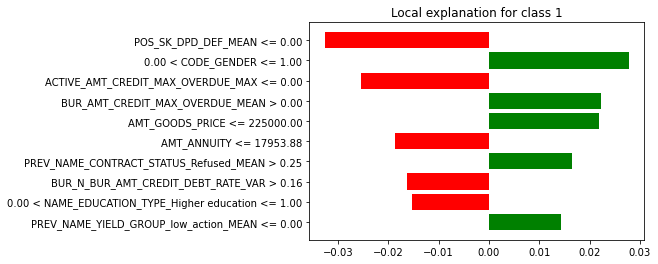

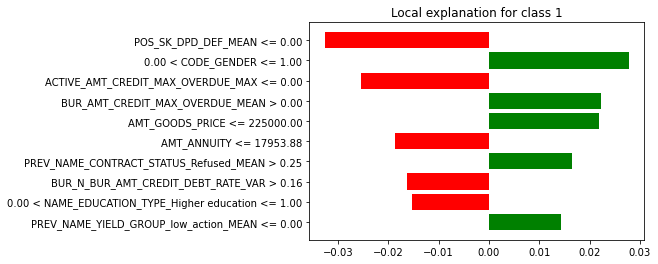

In [111]:
exp_test.as_pyplot_figure()

In [112]:
exp_test.available_labels()

[1]

In [60]:
inputs.iloc[:, [250]]

POS_SK_DPD_DEF_MEAN
SK_ID_CURR                     
100001                      1.0
100005                      0.0
100013                      0.0
100028                      0.0
100038                      0.0
...                         ...
456221                      0.0
456222                      0.0
456223                      0.0
456224                      0.0
456250                      0.0

[48744 rows x 1 columns]

In [72]:
explanation(210825)

In [74]:
explanation(210825)

# SHAP

In [83]:
explainerModel = shap.TreeExplainer(model)

In [85]:
explainerModel

In [86]:
shap_values_Model = explainerModel.shap_values(inputs.values)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [87]:
shap.initjs()

In [114]:
j = 299
print('credit_index =', j)
fig = shap.force_plot(explainerModel.expected_value[1], shap_values_Model[1][j], inputs.iloc[[j]])

credit_index = 299


In [115]:
fig

In [91]:
shap_values = shap_values_Model

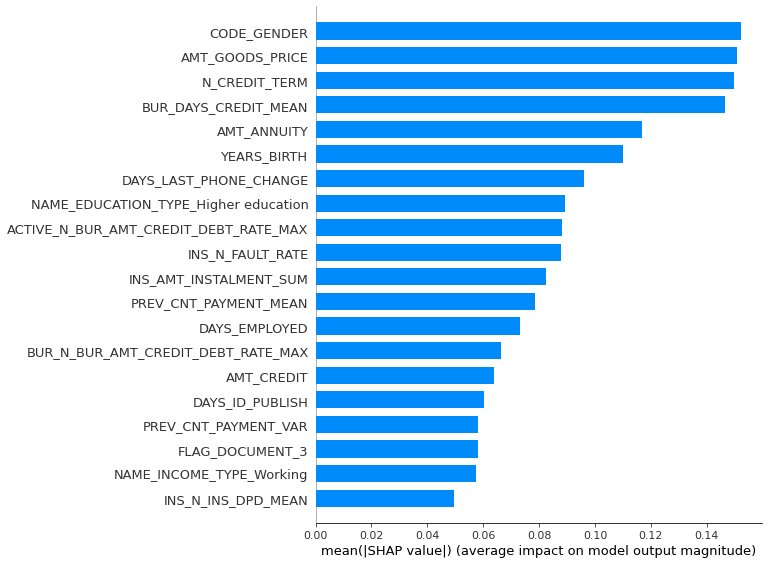

In [93]:
shap.summary_plot(shap_values[0], inputs, plot_type='bar')

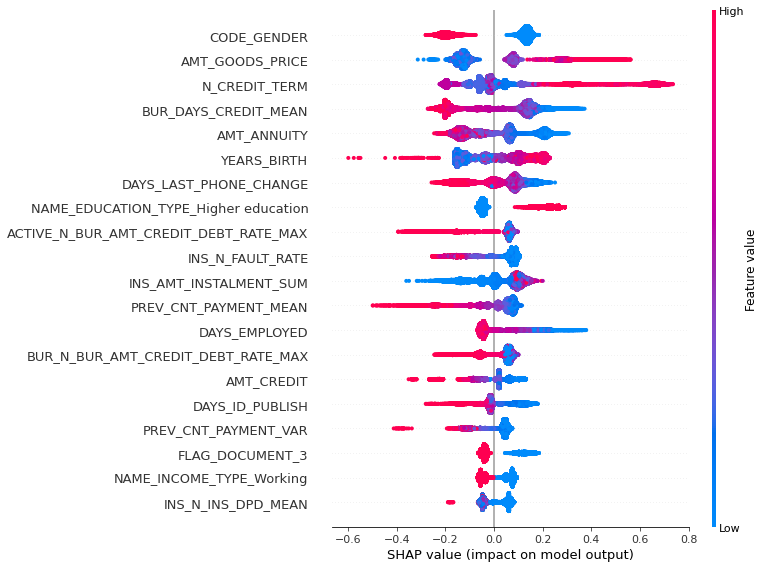

In [94]:
shap.summary_plot(shap_values[0], inputs, show=False)

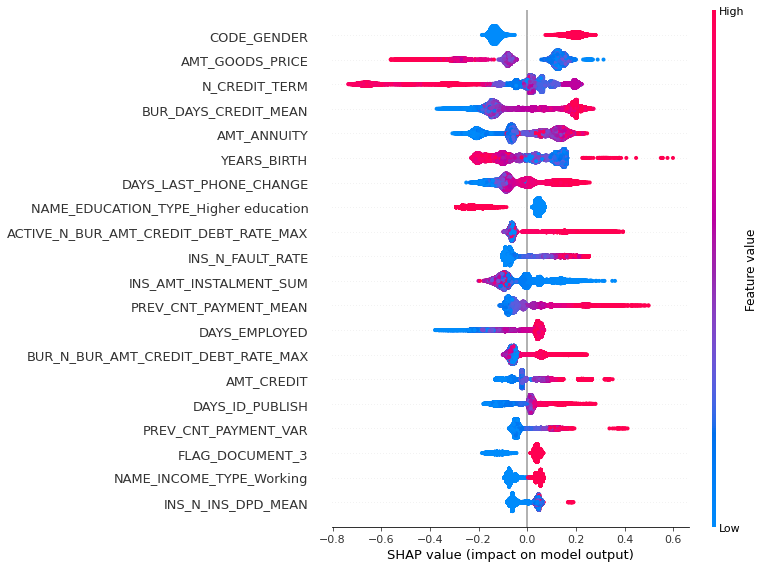

In [95]:
shap.summary_plot(shap_values[1], inputs, show=False)